<a href="https://colab.research.google.com/github/lima-breno/time_series/blob/main/TS_02_Estacionarias_ARMA_padaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Séries temporais estacionárias: ARMA

Este notebook busca uma série temporal de um arquivo escolhido e faz algumas análises preliminares, bem como a aplicação dos modelos de previsão autorregressivos de média móvel.

Data da última atualização: 17/02/2025

#### Preliminares

In [ ]:
# Carregamento das bibliotecas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Ajuste das preferências gráficas

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#FFFFFF',    # Cor da moldura
    'axes.facecolor': '#FFFFFF',      # Cor do fundo
    'savefig.facecolor':'#000000',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': True,
    'grid.color': '#888888',
    'grid.linewidth': '0.1',
    'text.color': '#000000',
    'axes.labelcolor': '#000000',
    'xtick.color': '#000000',
    'ytick.color': '#000000',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (21,13)

#### Carregamento da Série Temporal

In [ ]:
# Leitura do arquivo de dados

MinhaSerieTemporal = pd.read_csv('HistoricoVendasPadaria.csv', index_col = 0)

In [ ]:
# Exibição do DataFrame

MinhaSerieTemporal

,Vendas
Data,
2024-02-04,52
2024-02-05,20
2024-02-06,34
2024-02-07,31
2024-02-08,36
...,...
2025-01-28,31
2025-01-29,31
2025-01-30,41


In [ ]:
# Ajuste do índice para formato DateTime

MinhaSerieTemporal.index = pd.to_datetime(MinhaSerieTemporal.index)

<Axes: xlabel='Data'>

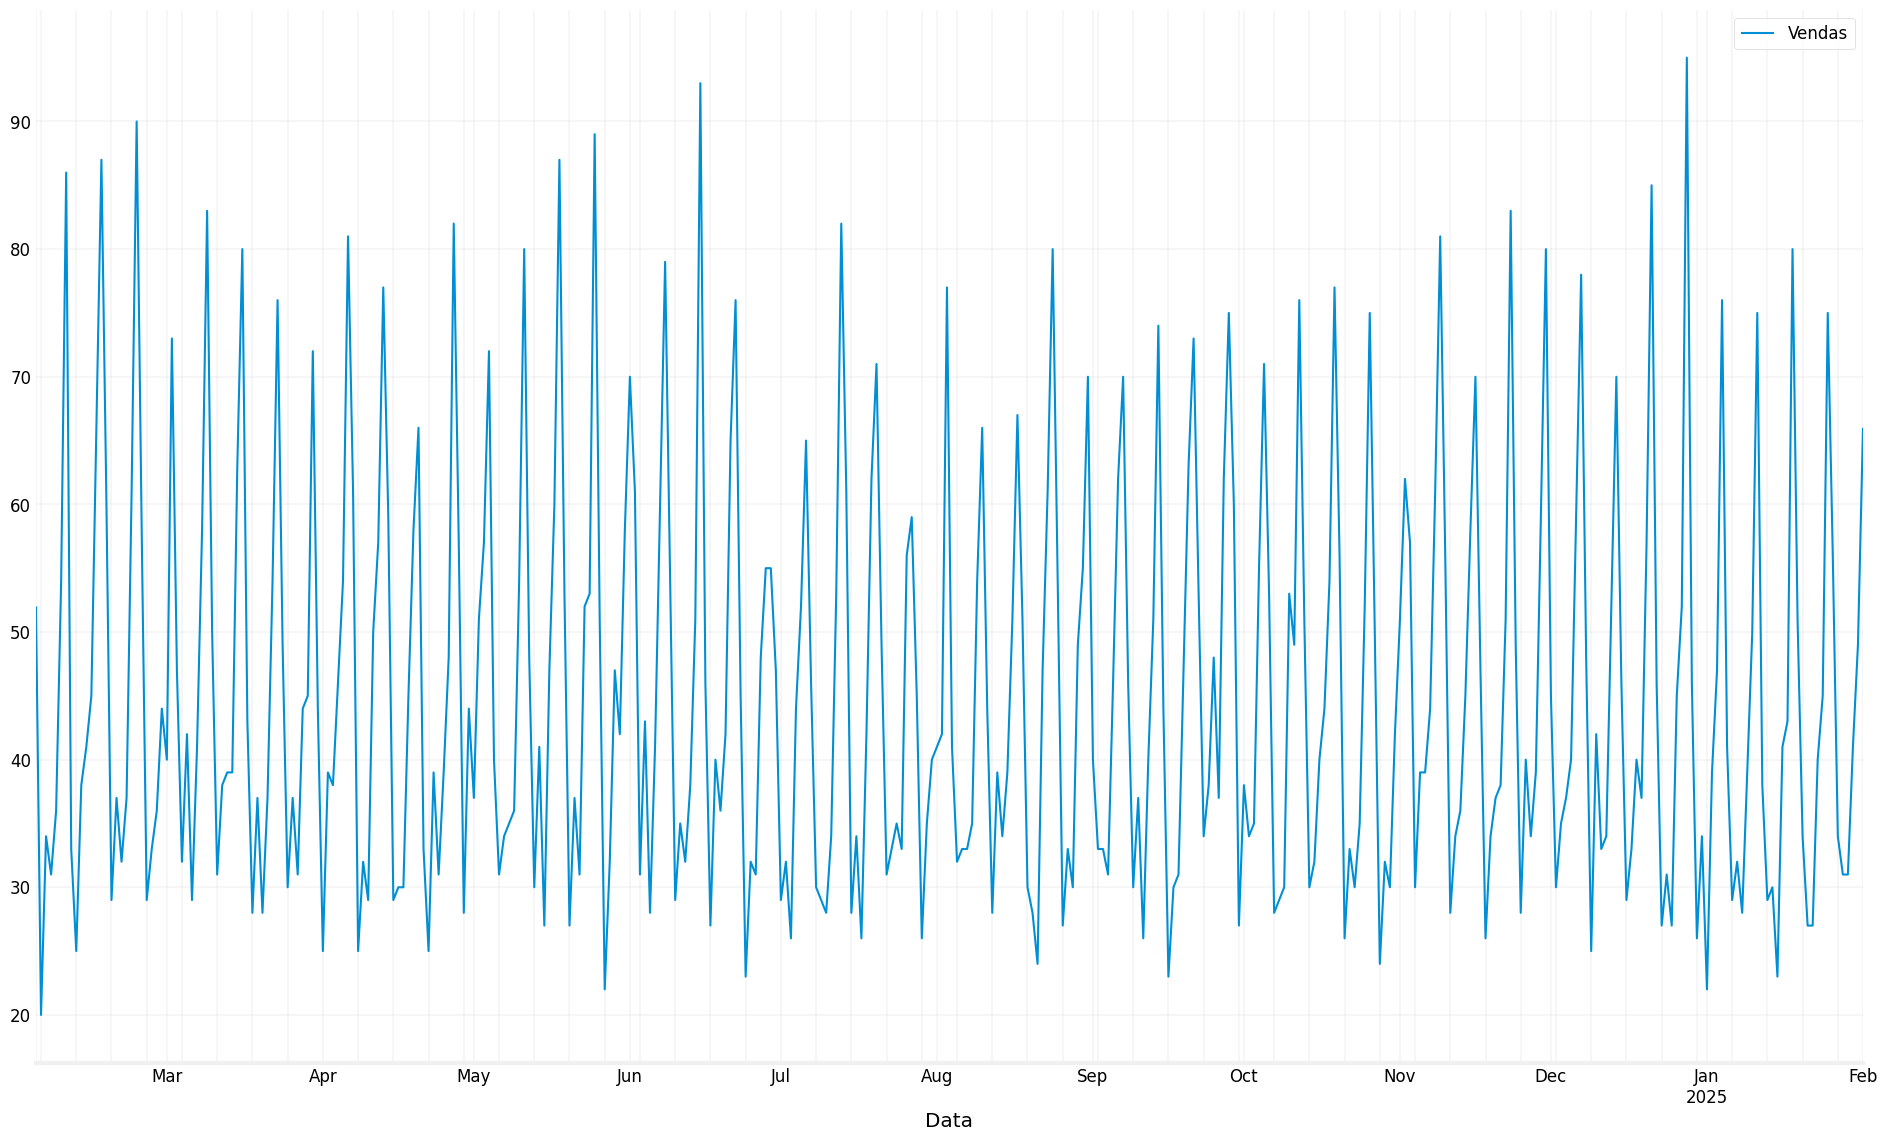

In [ ]:
# Gráfico
MinhaSerieTemporal.plot()

#### Decomposição da Série

In [ ]:
# Decomposição aditiva da série temporal

PeriodoSazonal = 7     # Sazonalidade semanal

Decomposicao = seasonal_decompose(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], model = "add", period = PeriodoSazonal)

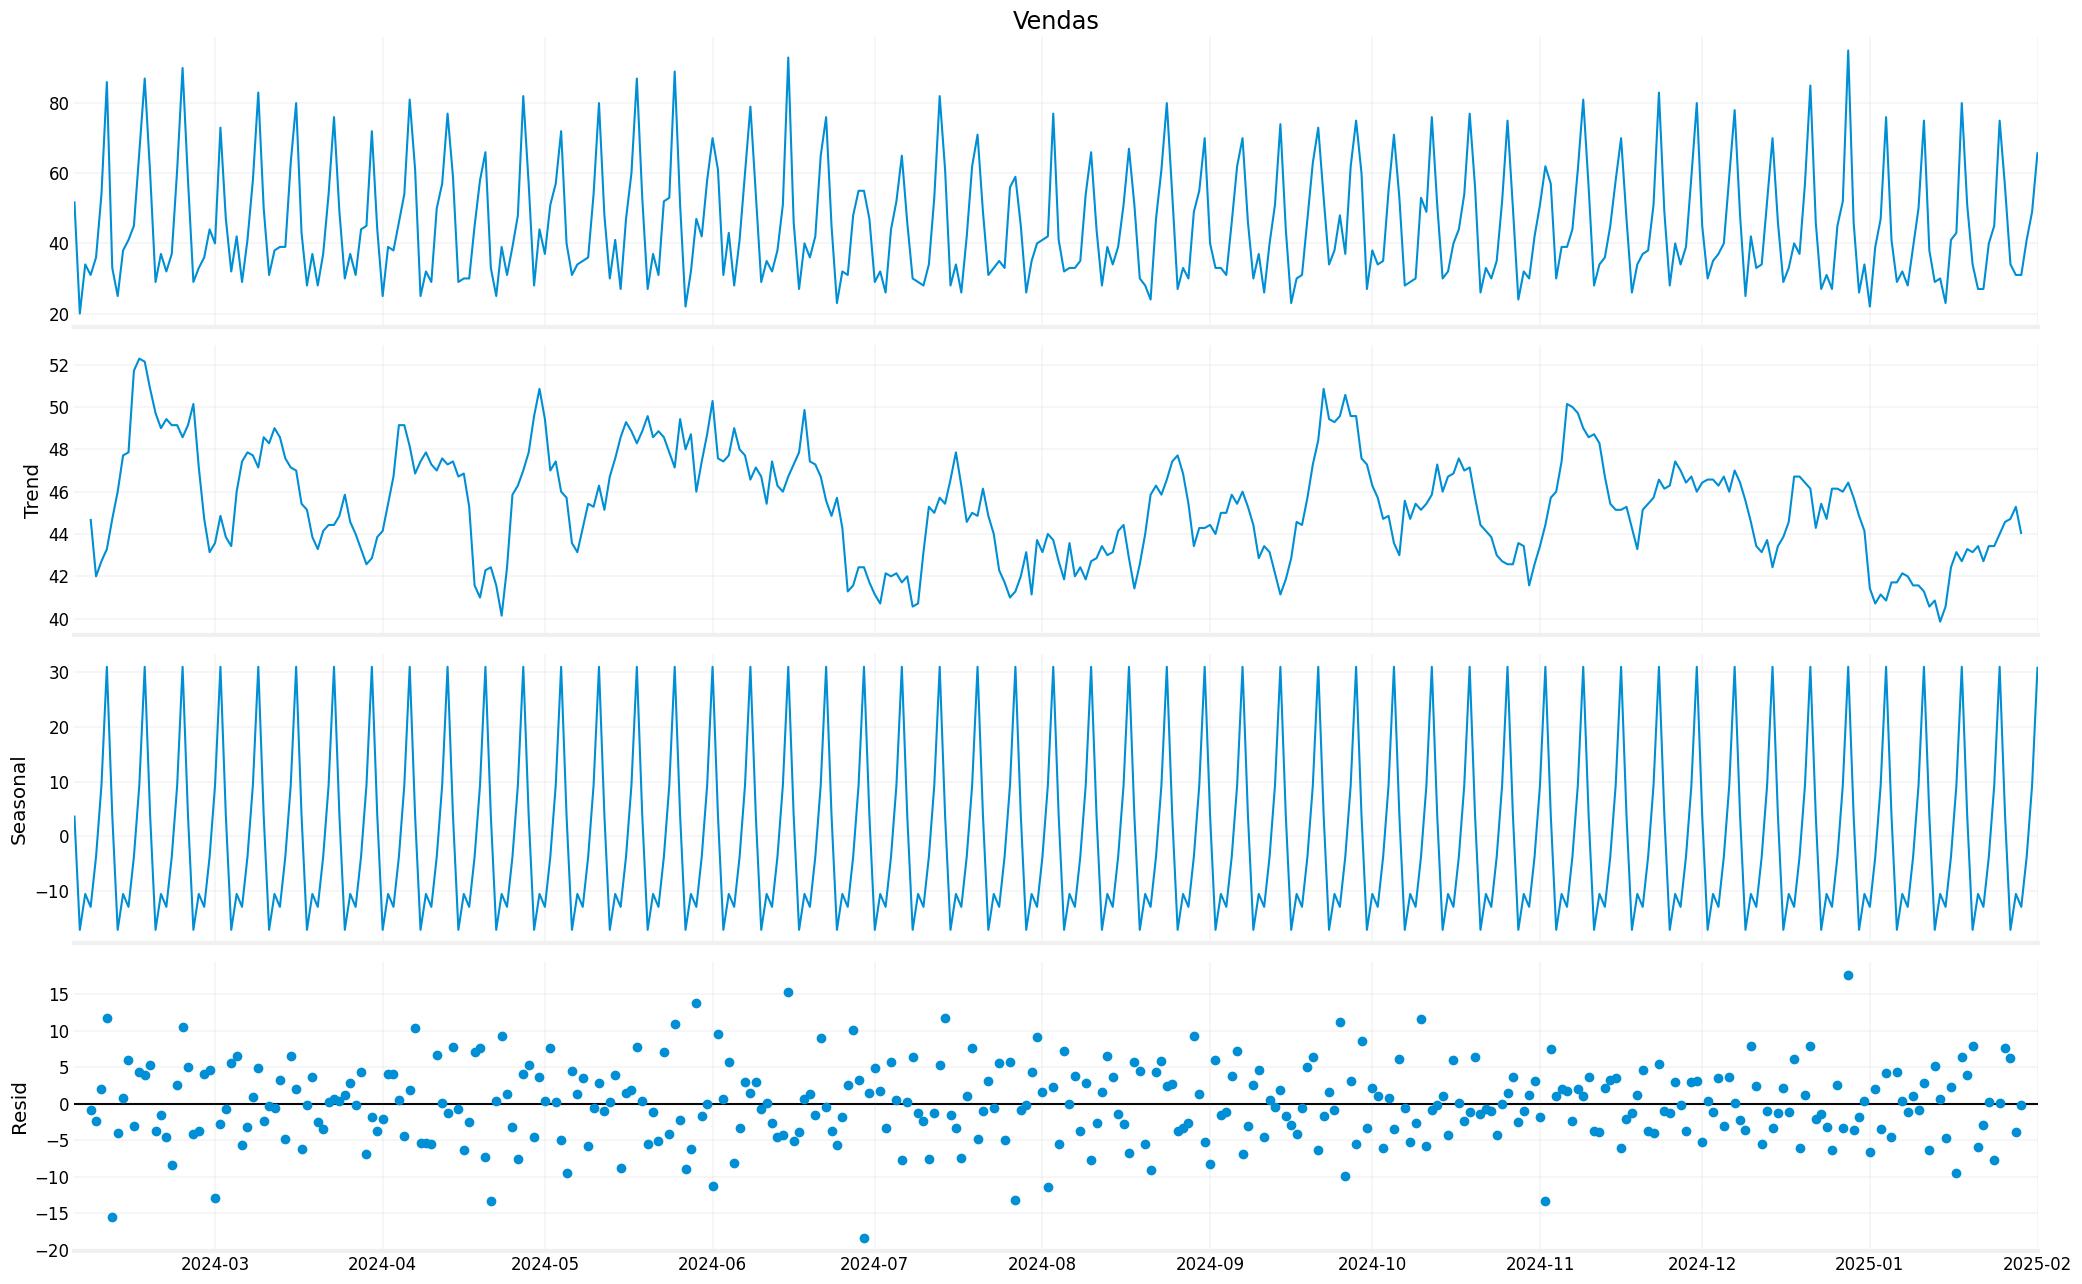

In [ ]:
Decomposicao.plot();

#### Teste ADF

In [ ]:
# Teste ADF para estacionariedade

ad_fuller_result = adfuller(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]])

print(f'Estatística ADF: {ad_fuller_result[0]:2.4f}')
print(f'p-value:         {ad_fuller_result[1]*100: 2.4f} %')

Estatística ADF: -4.1514
p-value:          0.0795 %


O teste ADF permite concluir se a série é estacionária ou não. Caso o ADF seja negativo e Pvalor <0.05, ela é estacionária!

In [ ]:
# Teste ADF para estacionariedade para a série das diferenças finitas de ordem escolhida

OrdemDif = 1

ad_fuller_result = adfuller(np.diff(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], n = OrdemDif))

print(f'Estatística ADF: {ad_fuller_result[0]:2.4f}')
print(f'p-value:         {ad_fuller_result[1]*100: 2.4f} %')

# aqui tenho que ajustar  a OrdemDif para deixar com um p-valor menor que 5% e uma estatística ADF menor que zero)

Estatística ADF: -9.9963
p-value:          0.0000 %


#### Funcão de autocorrelação

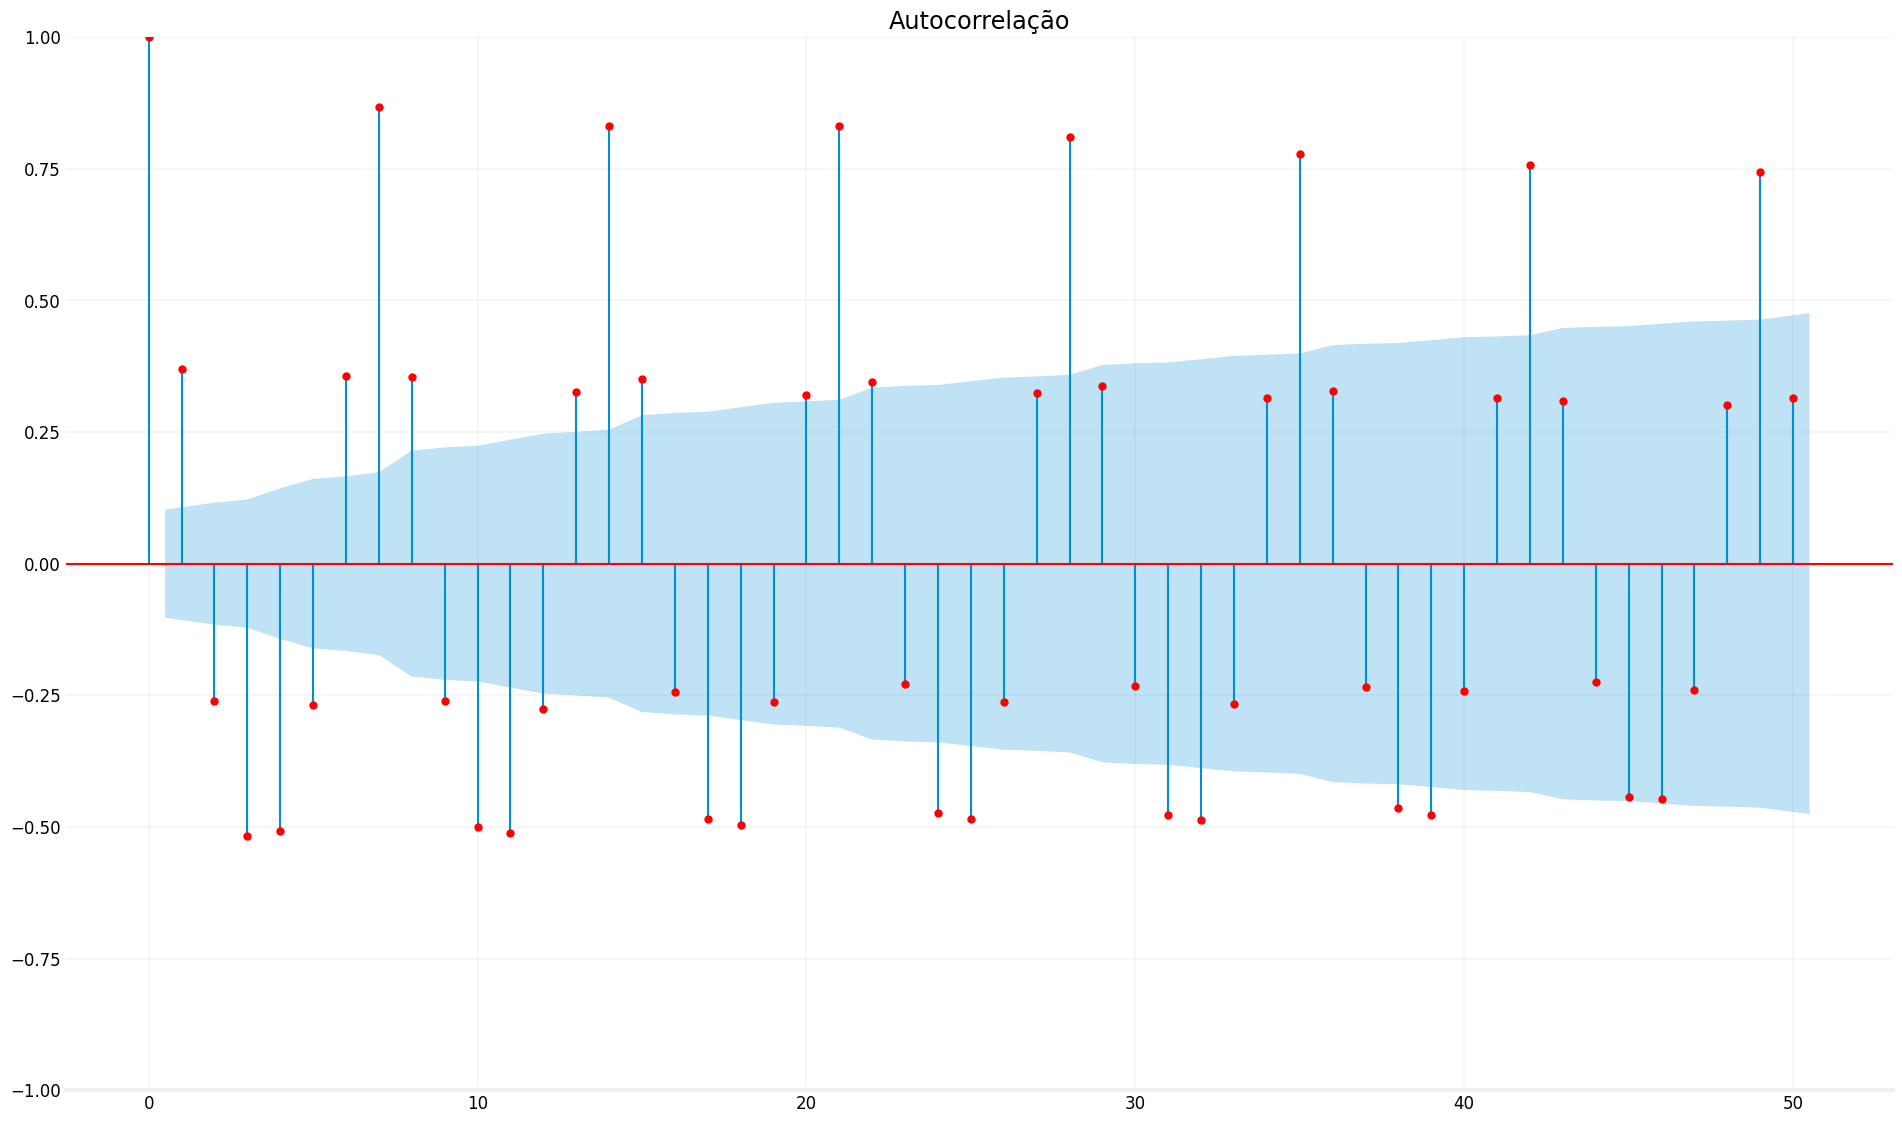

In [ ]:
# Função de correlação para série temporal

plot_acf(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]],  lags=50, title = "Autocorrelação", color="red");

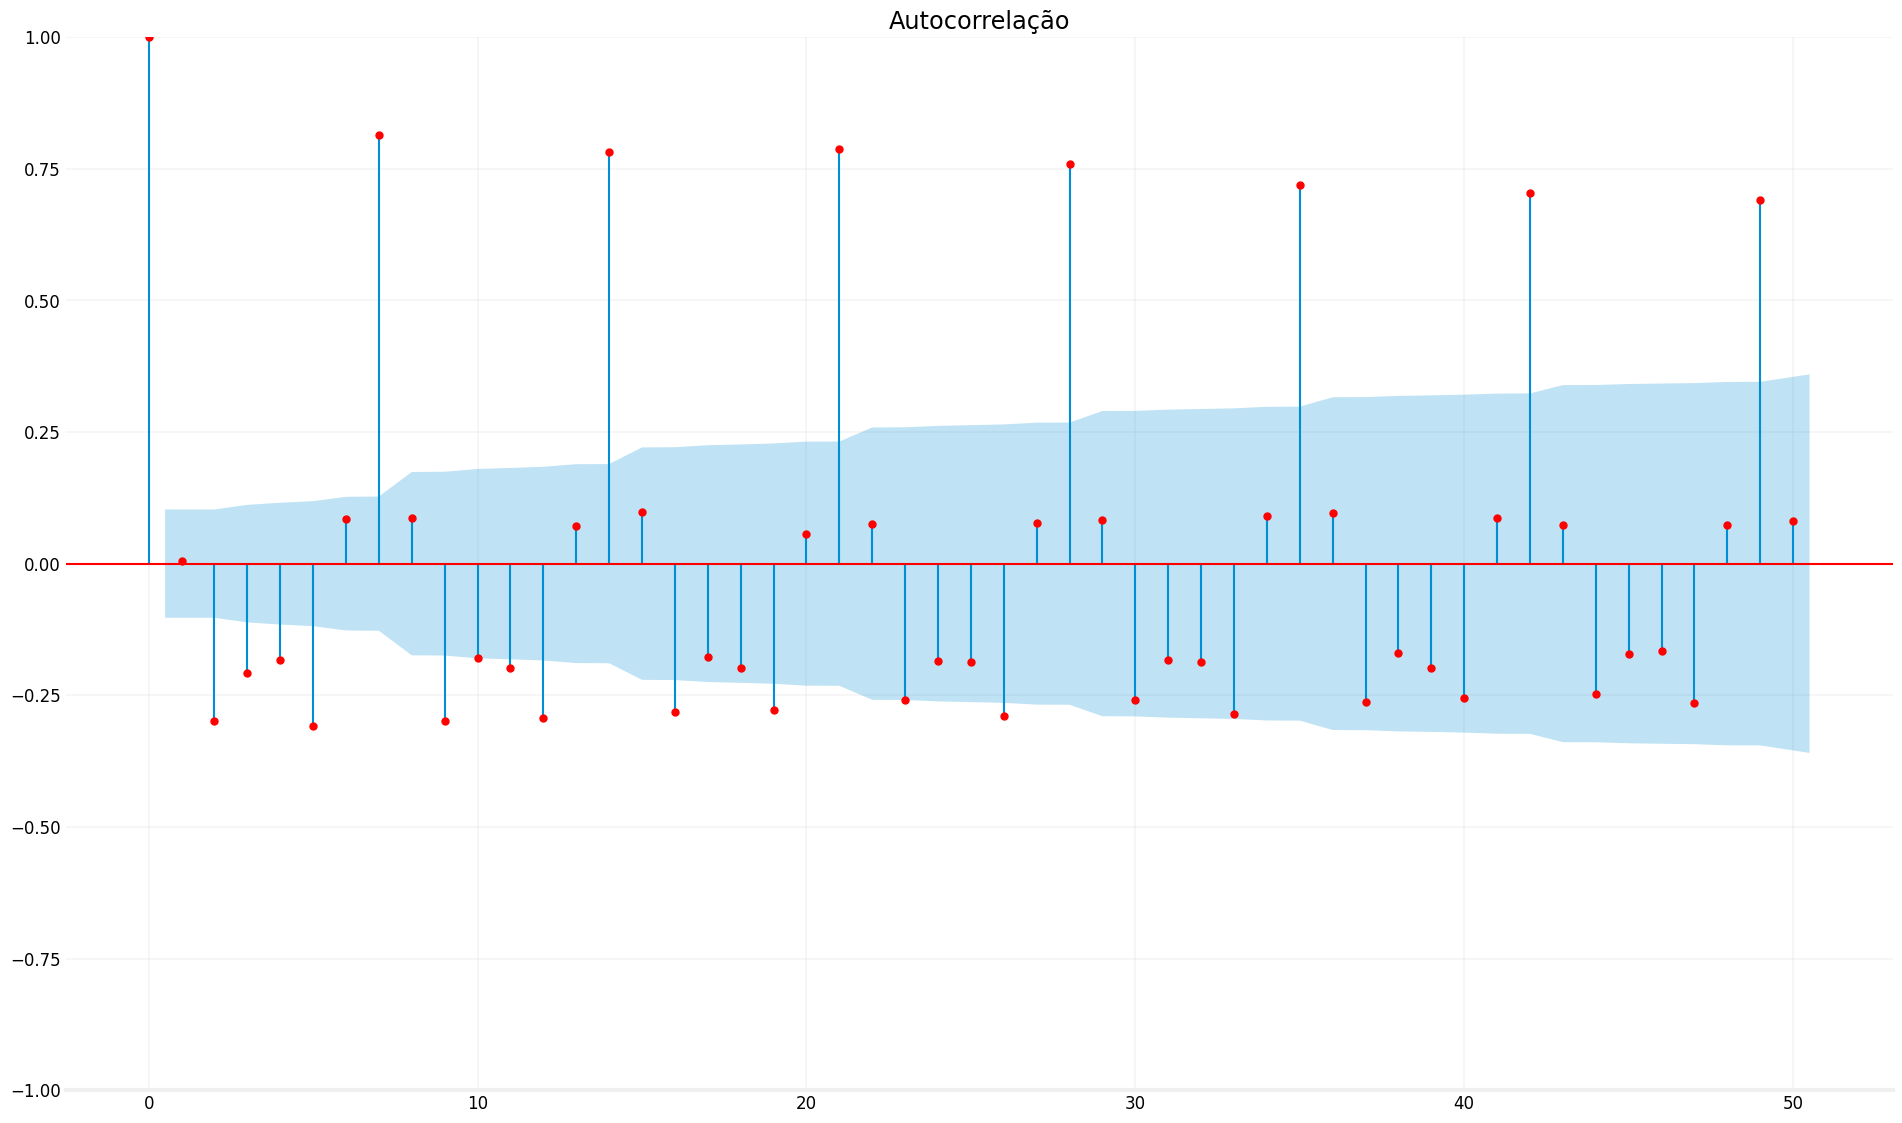

In [ ]:
# Função de correlação para série das diferenças finitas da ordem escolhida acima

plot_acf(np.diff(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], n = OrdemDif),  lags=50, title = "Autocorrelação", color="red");

#### Funcão de autocorrelação parcial

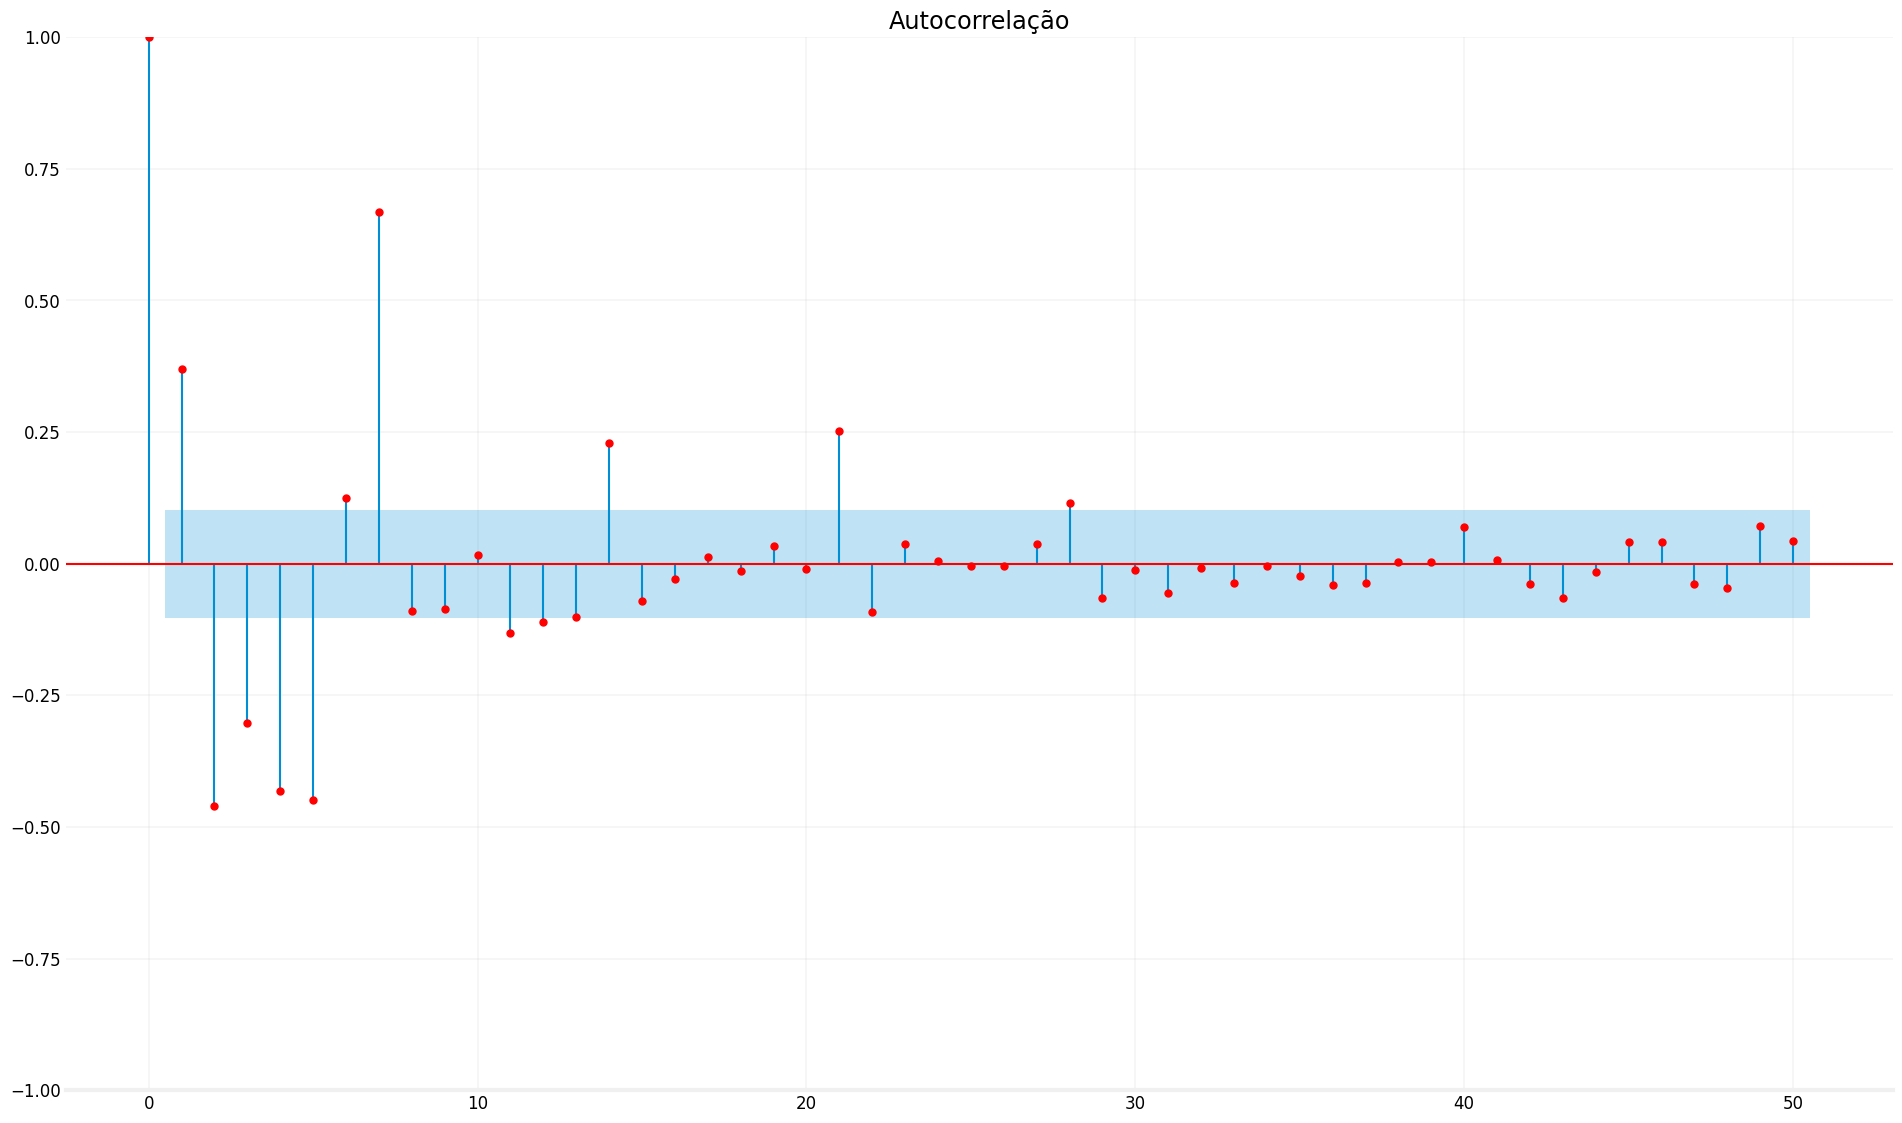

In [ ]:
# Função de correlação parcial para série temporal

plot_pacf(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]],  lags=50, title = "Autocorrelação", color="red");

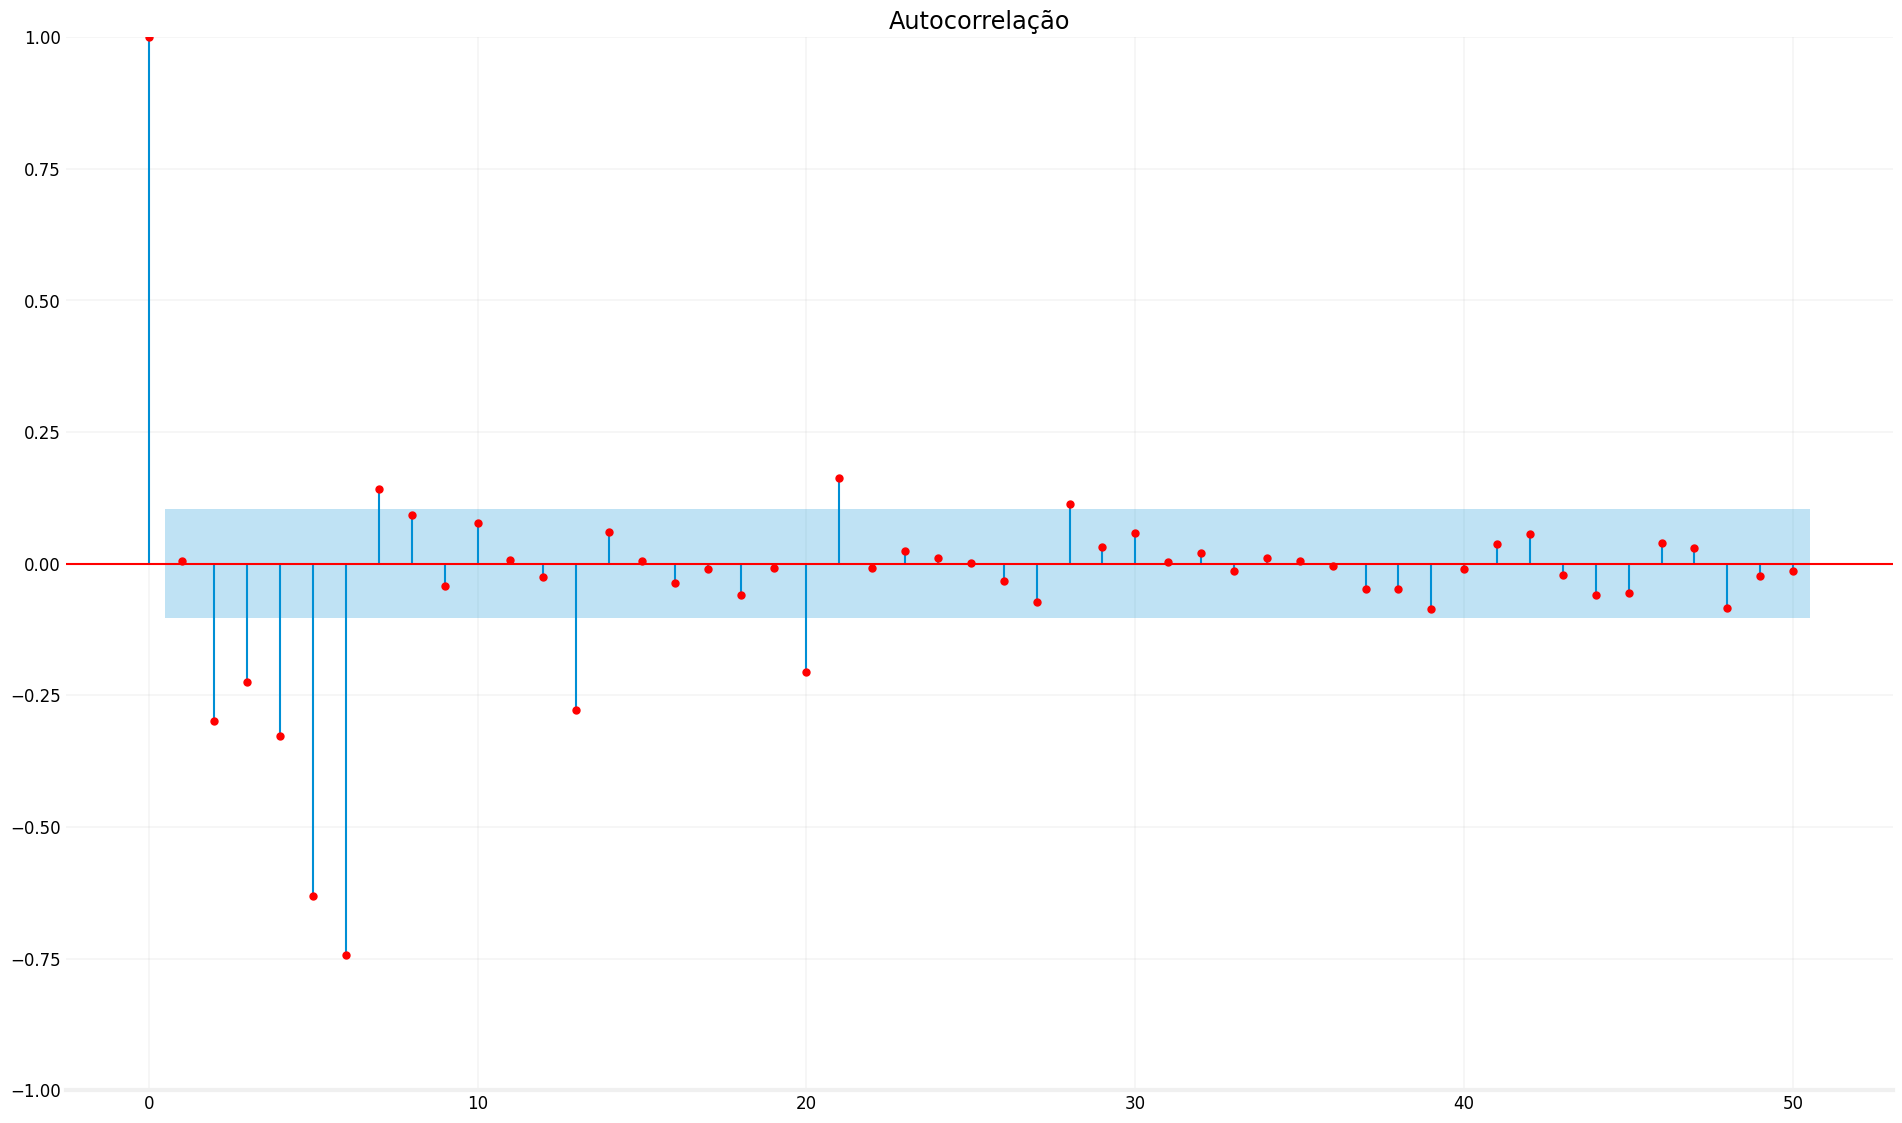

In [ ]:
# Função de correlação parcial para série das diferenças finitas da ordem escolhida acima

plot_pacf(np.diff(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], n = OrdemDif),  lags=50, title = "Autocorrelação", color="red");

#### Separação das bases de treino e teste

In [ ]:
# Definição da proporção de dados para compor a base de teste

PercentualTeste = 10

In [ ]:
# Cálculo do tamanho do período de testes
PeriodoTeste = PercentualTeste * len(MinhaSerieTemporal) // 100

# Definição do DataFrame de treino
TreinoDF = pd.DataFrame(index = MinhaSerieTemporal[:-PeriodoTeste].index)
TreinoDF['Treino'] = MinhaSerieTemporal[:-PeriodoTeste][MinhaSerieTemporal.columns[0]]

# Definição do DataFrame de teste
TesteDF  = pd.DataFrame(index = MinhaSerieTemporal[-PeriodoTeste:].index)
TesteDF['Teste'] = MinhaSerieTemporal[-PeriodoTeste:][MinhaSerieTemporal.columns[0]]

<Axes: xlabel='Data'>

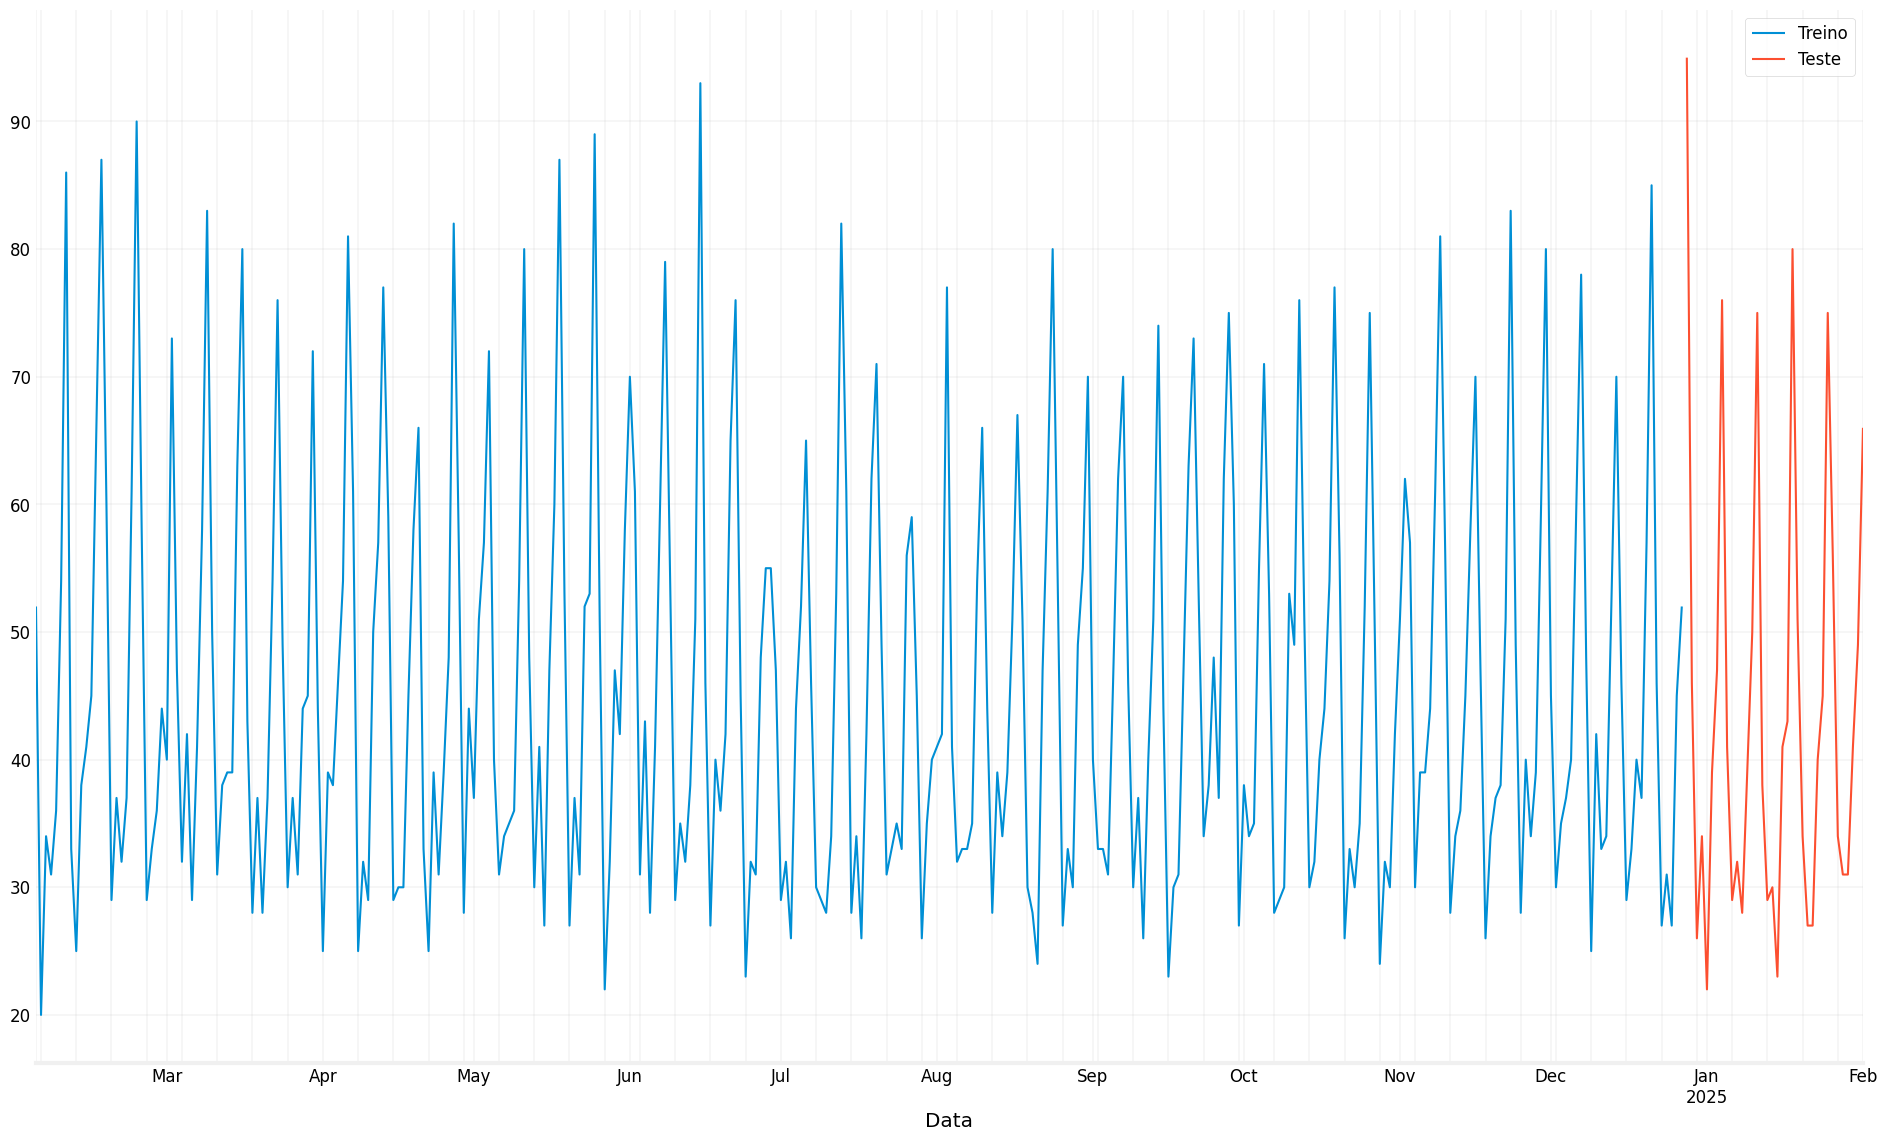

In [ ]:
# Exibe a série temporal, com a separação da base de dados

pd.concat([TreinoDF,TesteDF], axis = 1).plot()

#### Previsão pelo modelo ARMA

In [ ]:
# Definição da ordem de autorregressividade

p = 7

# Definição da ordem da média móvel

q = 0

In [ ]:
model = SARIMAX(TreinoDF, order=(p,0,q))
model_fit = model.fit(disp=False)

print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Treino   No. Observations:                  328
Model:               SARIMAX(7, 0, 0)   Log Likelihood               -1132.824
Date:                Sun, 30 Mar 2025   AIC                           2281.648
Time:                        11:47:34   BIC                           2311.992
Sample:                    02-04-2024   HQIC                          2293.755
                         - 12-27-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1567      0.033      4.765      0.000       0.092       0.221
ar.L2         -0.0505      0.041     -1.229      0.219      -0.131       0.030
ar.L3         -0.0130      0.042     -0.306      0.7

In [ ]:
PrevisoesSARIMAX = model_fit.get_prediction(len(TreinoDF), len(TreinoDF) + len(TesteDF) - 1).predicted_mean

In [ ]:
# Montagem do DataFrame de previsão

PrevisoesDF  = pd.DataFrame(index = MinhaSerieTemporal[-PeriodoTeste:].index)
PrevisoesDF['Previsão'] = PrevisoesSARIMAX

<Axes: xlabel='Data'>

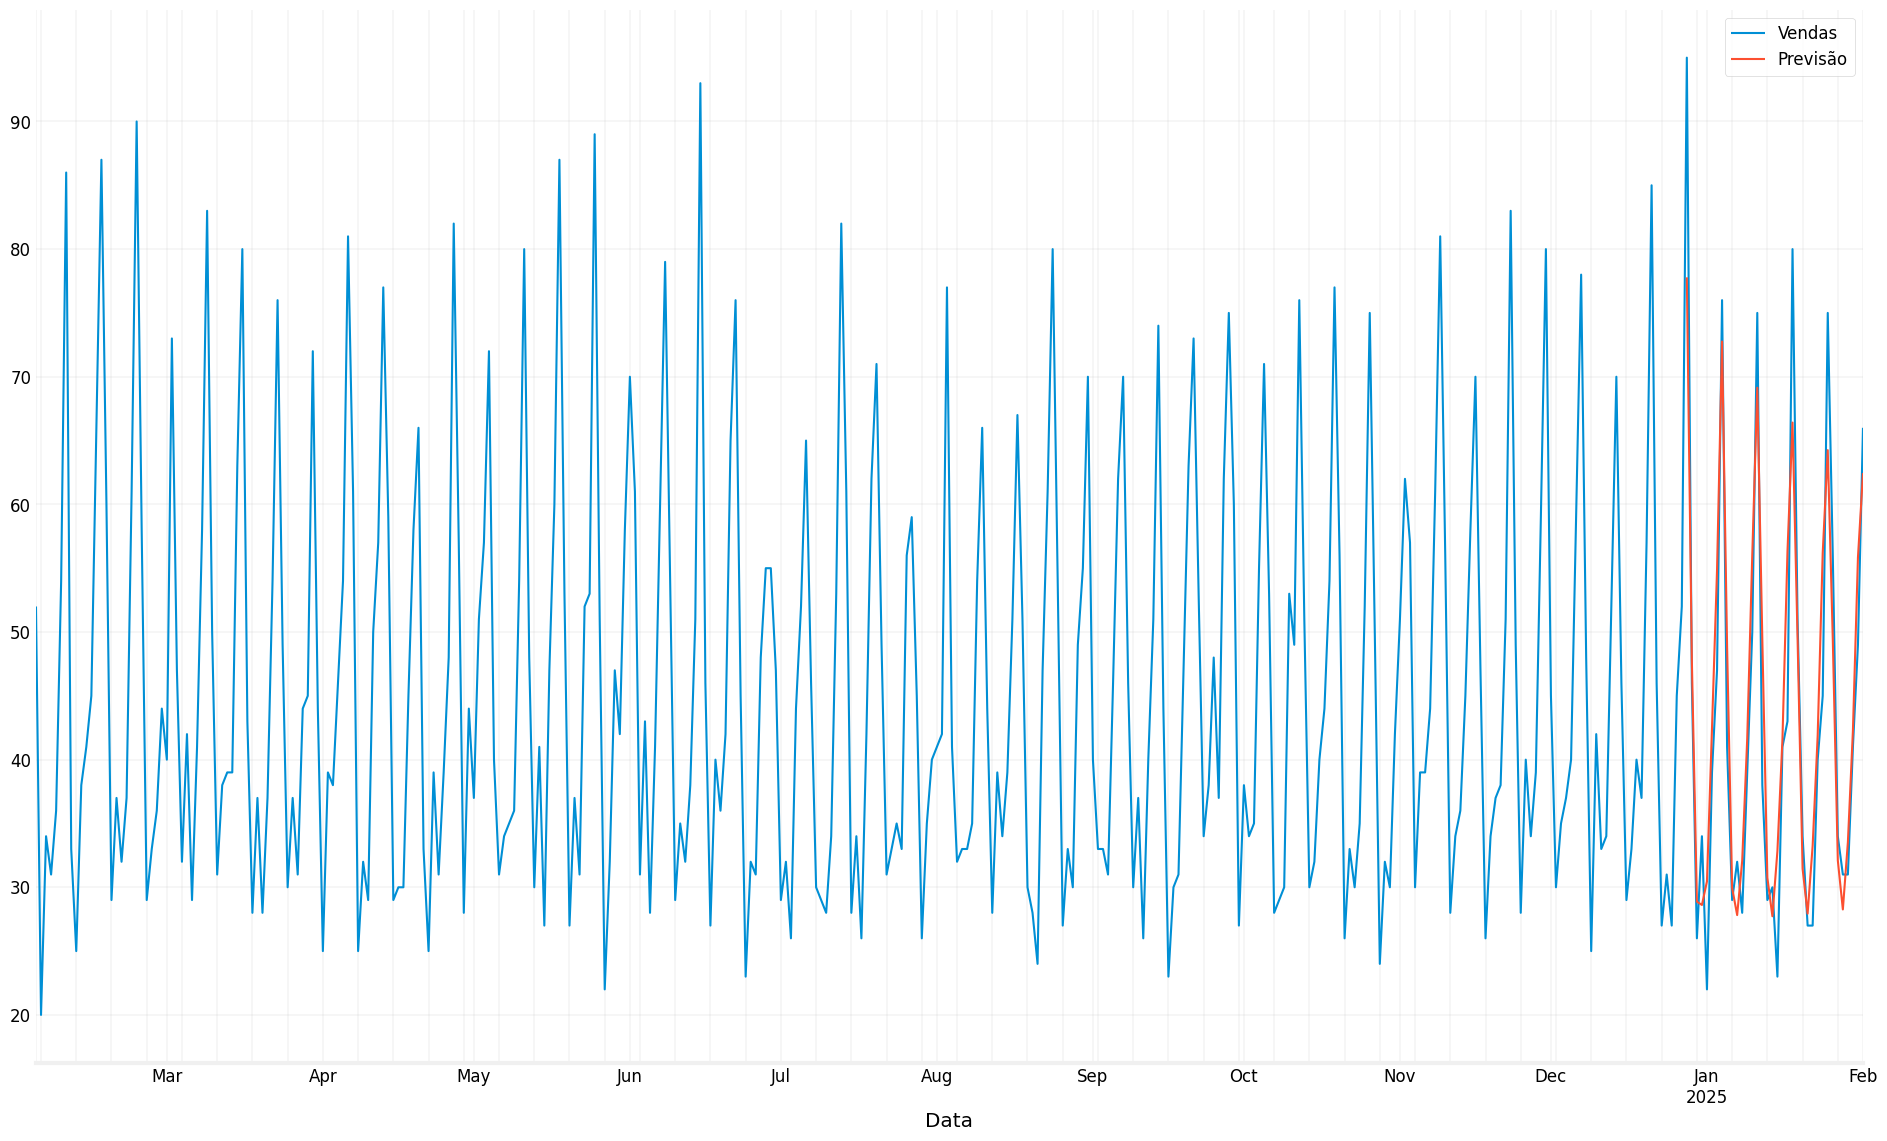

In [ ]:
# Exibe a série temporal, com a separação da base de dados

pd.concat([MinhaSerieTemporal,PrevisoesDF], axis = 1).plot()

#### Medidas de erro

In [ ]:
# Cáluclo do vetor de erros

Erros = PrevisoesDF['Previsão'].values - TesteDF['Teste'].values
Erros

array([-17.21259762,   1.75157799,   2.8764317 ,  -5.3865201 ,
         8.46160036,   3.46574381,   7.83007459,  -3.23992787,
         7.85236645,   0.9549636 ,  -4.17679312,   4.07084233,
         2.65504365,   6.01514178,  -5.86049211,  11.39385048,
         1.75511105,  -2.27017056,   9.84437488,   0.62349443,
        13.3306997 , -13.5902339 ,  -1.46093414,  -2.54478507,
         0.93398476,   6.26203569,   1.90238442,  11.1999408 ,
       -10.75228306,  -6.56987757,  -1.89594506,  -2.73653463,
         2.54181104,   1.2692246 ,   6.84774418,  -3.54288668])

In [ ]:
# Cálculo do erro médio
ErroMedio = Erros.mean()

In [ ]:
# Cálculo do erro absoluto médio
MAE = np.abs(Erros).mean()

In [ ]:
# Cálculo da raiz do erro quadrático médio
RMSE = np.sqrt((Erros**2).mean())

In [ ]:
# Cálculo dos erros relativos
ErrosRelativos = Erros / TesteDF['Teste'].values
ErrosRelativos

array([-0.18118524,  0.03807778,  0.11063199, -0.15842706,  0.3846182 ,
        0.08886523,  0.16659733, -0.04263063,  0.19152113,  0.03292978,
       -0.13052478,  0.14538723,  0.06807804,  0.12030284, -0.07813989,
        0.29983817,  0.06052107, -0.07567235,  0.4280163 ,  0.01520718,
        0.31001627, -0.16987792, -0.02864577, -0.07484662,  0.03459203,
        0.23192725,  0.04755961,  0.24888757, -0.14336377, -0.11731924,
       -0.05576309, -0.08827531,  0.0819939 ,  0.0309567 ,  0.13974988,
       -0.0536801 ])

In [ ]:
# Cálculo do erro percentual absoluto médio
MAPE = np.abs(ErrosRelativos).mean()

In [ ]:
print(f'Medidas de erro de previsão')
print()
print(f'Modelo de previsão: ARMA({p},{q})')
print()
print(f'Erro médio: {ErroMedio: 2.1f}')
print(f'MAE:        {MAE: 2.1f}')
print(f'RMSE:       {RMSE: 2.1f}')
print(f'MAPE:       {MAPE*100: 2.1f} %')

Medidas de erro de previsão

Modelo de previsão: ARMA(7,0)

Erro médio:  0.9
MAE:         5.4
RMSE:        6.8
MAPE:        13.0 %


Conclusão:

Com base nos resultados do modelo ARMA(7,0) e nas medidas de erro apresentadas, posso concluir o seguinte:

* Estacionariedade: O teste ADF realizado anteriormente indicou que a série temporal original não era estacionária, mas a série diferenciada de primeira ordem (OrdemDif = 1) apresentou um p-valor muito baixo (0.0000%), sugerindo que a série diferenciada se tornou estacionária. Isso valida o uso de modelos ARIMA ou ARMA em séries diferenciadas.


* Resultados do Modelo ARMA(7,0): O sumário do modelo mostra os coeficientes e a significância estatística (p-value) dos termos autorregressivos (AR). O termo AR de lag 7 (ar.L7) é o mais significativo (p-value próximo de zero) e tem um coeficiente positivo alto (0.7707), indicando uma forte dependência do valor atual com o valor de 7 períodos atrás. Os termos AR de lags 1 e 6 também são significativos.


**Medidas de Erro:**
 - Erro Médio (0.9): Indica que, em média, as previsões estão um pouco acima dos valores reais, mas o valor é próximo de zero, o que é um bom sinal.
- MAE (5.4): O Erro Absoluto Médio mostra que, em média, a magnitude dos erros de previsão é de aproximadamente 5.4 unidades.
- RMSE (6.8): A Raiz do Erro Quadrático Médio penaliza erros maiores e indica que os erros tendem a estar em torno de 6.8 unidades. É ligeiramente maior que o MAE, o que é esperado.
- MAPE (13.0 %): O Erro Percentual Absoluto Médio indica que, em média, as previsões têm um erro de aproximadamente 13.0% em relação aos valores reais. Dependendo da aplicação, este valor pode ser considerado aceitável ou indicar a necessidade de refinar o modelo.

Em resumo, o modelo ARMA(7,0) capturou parte da dinâmica da série temporal, especialmente a sazonalidade semanal (devido ao termo AR.L7 significativo e a sazonalidade semanal identificada na decomposição). No entanto, um MAPE de 13.0% sugere que pode haver espaço para melhorias.
